In [2]:
import numpy as np

# parameters
S0 = 100      # initial stock price
K = 100       # strike price
r = 0.05      # risk-free rate
sigma = 0.2   # volatility
T = 1.0       # time to maturity (years)
N = 10000     # number of Monte Carlo simulations

# simulate standard normal samples
Z = np.random.randn(N)

# Geometric Brownian Motion terminal stock prices
ST = S0 * np.exp((r - 0.5 * sigma**2)*T + sigma*np.sqrt(T)*Z)

# payoff of a European call option
payoffs = np.maximum(ST - K, 0)

# discounted Monte Carlo price
price_mc = np.exp(-r*T) * np.mean(payoffs)

price_mc


np.float64(10.434495263273458)

In [ ]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

price_bs = black_scholes_call(S0, K, r, sigma, T)
price_bs


np.float64(10.450583572185565)

In [4]:
print("Monte Carlo Price:", price_mc)
print("Black-Scholes Price:", price_bs)
print("Absolute Error:", abs(price_mc - price_bs))


Monte Carlo Price: 10.434495263273458
Black-Scholes Price: 10.450583572185565
Absolute Error: 0.01608830891210644


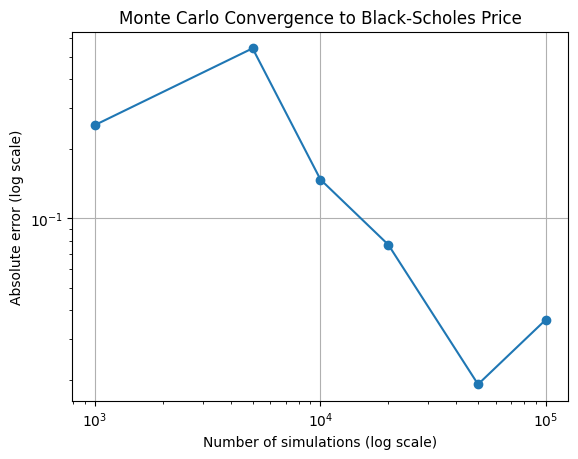

In [5]:
import matplotlib.pyplot as plt

Ns = [1000, 5000, 10000, 20000, 50000, 100000]
errors = []

for N in Ns:
    Z = np.random.randn(N)
    ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    payoffs = np.maximum(ST - K, 0)
    price_mc_N = np.exp(-r*T) * np.mean(payoffs)
    errors.append(abs(price_mc_N - price_bs))

plt.plot(Ns, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of simulations (log scale)")
plt.ylabel("Absolute error (log scale)")
plt.title("Monte Carlo Convergence to Black-Scholes Price")
plt.grid(True)
plt.show()


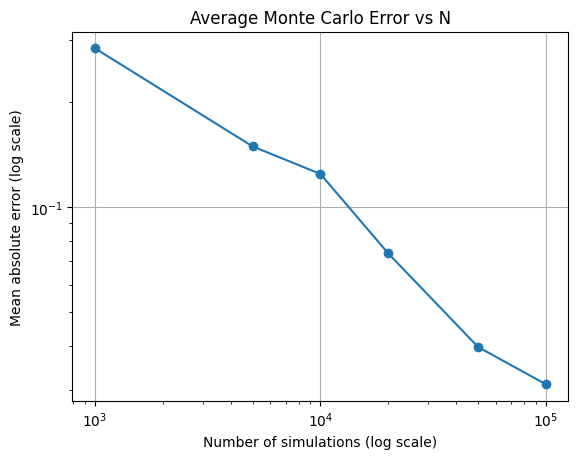

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ns = [1000, 5000, 10000, 20000, 50000, 100000]
mean_errors = []

num_repeats = 20  # how many times to repeat MC for each N

for N in Ns:
    errors_N = []
    for _ in range(num_repeats):
        Z = np.random.randn(N)
        ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
        payoffs = np.maximum(ST - K, 0)
        price_mc_N = np.exp(-r * T) * np.mean(payoffs)
        errors_N.append(abs(price_mc_N - price_bs))
    mean_errors.append(np.mean(errors_N))

plt.plot(Ns, mean_errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of simulations (log scale)")
plt.ylabel("Mean absolute error (log scale)")
plt.title("Average Monte Carlo Error vs N")
plt.grid(True)
plt.show()
